In [ ]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 

parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)



In [2]:
type(data)

dict

In [3]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

In [15]:


def api_runner():
    
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


 # Use this if you just want to keep it in a dataframe
    df = pd.json_normalize(data['data'])
    df['Timestamp'] = pd.to_datetime('now')
    df 
  # Use this if you want to append to a CSV file
    import os
    if not os.path.isfile(r'crypto_data.csv'):
        df.to_csv('crypto_data.csv', header='column_names')
    else:
        df.to_csv('crypto_data.csv', mode='a', header=False)

In [19]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed


KeyboardInterrupt: 

In [20]:
df70 = pd.read_csv('crypto_data.csv')


In [21]:
df70

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,12489,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.995632e+07,1.995632e+07,False,1.686232e+12,NaN,1,NaN,NaN,NaN,2025-12-01T16:05:00.000Z,84496.154026,7.416386e+10,86.0795,-1.498262,-7.611440,-2.793043,-23.453067,-29.520153,-23.901100,1.686232e+12,58.4597,1.774419e+12,NaN,2025-12-01T16:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-01 21:37:46.575520
1,1,1027,Ethereum,ETH,ethereum,11218,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.206955e+08,1.206955e+08,True,3.305299e+11,NaN,2,NaN,NaN,NaN,2025-12-01T16:05:00.000Z,2738.543465,3.030996e+10,151.8454,-2.563670,-9.647375,-4.122345,-29.726756,-38.347858,-36.431511,3.305299e+11,11.4601,3.305299e+11,NaN,2025-12-01T16:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-01 21:37:46.575520
2,2,825,Tether USDt,USDT,tether,160360,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,1.846051e+11,1.868680e+11,True,1.868437e+11,NaN,3,NaN,NaN,NaN,2025-12-01T16:05:00.000Z,0.999870,1.187351e+11,100.7553,0.004196,-0.021531,0.040902,-0.038125,-0.067941,-0.093544,1.845811e+11,6.3992,1.868437e+11,NaN,2025-12-01T16:05:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-12-01 21:37:46.575520
3,3,52,XRP,XRP,xrp,1763,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,6.033164e+10,9.998575e+10,False,2.004200e+11,NaN,4,NaN,NaN,NaN,2025-12-01T16:05:00.000Z,2.004485,4.704250e+09,151.7348,-1.335004,-8.830277,-4.486313,-19.897777,-33.040800,-28.259965,1.209339e+11,4.1930,2.004485e+11,NaN,2025-12-01T16:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-01 21:37:46.575520
4,4,1839,BNB,BNB,bnb,2984,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",1.377363e+08,1.377363e+08,1.377363e+08,False,1.117562e+11,NaN,5,NaN,NaN,NaN,2025-12-01T16:05:00.000Z,811.377977,2.547240e+09,78.2671,-0.936019,-9.296509,-4.189924,-25.753277,-23.248998,-4.270502,1.117562e+11,3.8748,1.117562e+11,NaN,2025-12-01T16:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-01 21:37:46.575520
5,5,3408,USDC,USDC,usd-coin,35036,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,7.668319e+10,7.668319e+10,False,7.667599e+10,NaN,6,6.090122e+10,6.089551e+10,NaN,2025-12-01T16:05:00.000Z,0.999906,1.334756e+10,129.7985,0.014843,-0.017854,0.010963,-0.060047,0.014230,-0.040388,7.667599e+10,2.6585,7.667599e+10,NaN,2025-12-01T16:05:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-12-01 21:37:46.575520
6,6,5426,Solana,SOL,solana,1055,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,5.596530e+08,6.152094e+08,True,7.686503e+10,NaN,7,5.252369e+08,6.562375e+10,NaN,2025-12-01T16:05:00.000Z,124.941239,5.638513e+09,92.6403,-0.784605,-9.782284,-5.560494,-32.998372,-45.036901,-37.797756,6.992374e+10,2.4244,7.686503e+10,NaN,2025-12-01T16:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-01 21:37:46.575520
7,7,1958,TRON,TRX,tron,1262,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,9.467982e+10,9.467982e+10,True,2.633533e+10,NaN,8,9.466789e+10,2.633201e+10,NaN,2025-12-01T16:05:00.000Z,0.278151,8.004115e+08,117.0737,-0.117414,-1.452376,0.612998,-6.375922,-18.766591,-17.375350,2.633533e+10,

In [22]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [23]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,12489,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19956321.00000,19956321.00000,False,1683541227403.04004,NaN,1,NaN,NaN,None,2025-12-01T16:07:00.000Z,84361.30224,75454959434.59950,89.28630,-1.72087,-7.79435,-2.82073,-23.61721,-29.69480,-23.97008,1683541227403.03589,58.36640,1771587346959.58008,None,2025-12-01T16:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-01 21:39:37.848290
1,1027,Ethereum,ETH,ethereum,11218,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120695503.24215,120695503.24215,True,329863245507.25000,NaN,2,NaN,NaN,None,2025-12-01T16:07:00.000Z,2733.02018,31039257901.07168,157.75790,-2.81071,-9.92628,-3.91444,-29.97892,-38.59549,-36.41847,329863245507.25464,11.43700,329863245507.25000,None,2025-12-01T16:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-01 21:39:37.848290
2,825,Tether USDt,USDT,tether,160360,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,184605105440.05356,186868037021.56259,True,186838878046.09000,NaN,3,NaN,NaN,None,2025-12-01T16:07:00.000Z,0.99984,119342901031.75665,101.84240,0.00218,-0.04785,0.03272,-0.04090,-0.07808,-0.01306,184576299573.48203,6.39900,186838878046.09000,None,2025-12-01T16:07:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-12-01 21:39:37.848290
3,52,XRP,XRP,xrp,1763,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,60331635327.00000,99985752852.00000,False,200035063325.70999,NaN,4,NaN,NaN,None,2025-12-01T16:07:00.000Z,2.00064,4712113874.91714,152.32640,-1.34130,-9.03650,-4.66691,-20.13506,-33.22099,-28.44193,120701621470.44965,4.18500,200063566678.14999,None,2025-12-01T16:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-01 21:39:37.848290
4,1839,BNB,BNB,bnb,2984,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",137736253.18000,137736253.18000,137736253.18000,False,111683320815.20000,NaN,5,NaN,NaN,None,2025-12-01T16:07:00.000Z,810.84913,2551505168.93404,78.40010,-0.89122,-9.38945,-4.26233,-25.81683,-23.32099,-4.37210,111683320815.20047,3.87230,111683320815.20000,None,2025-12-01T16:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-01 21:39:37.848290
5,3408,USDC,USDC,usd-coin,35036,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,76683187288.71272,76683187288.71272,False,76662013607.69000,NaN,6,60901219650.23000,60884403669.51159,None,2025-12-01T16:07:00.000Z,0.99972,14032497752.10015,142.24680,-0.01826,-0.05772,-0.01657,-0.08366,-0.00721,0.00718,76662013607.68828,2.65800,76662013607.69000,None,2025-12-01T16:07:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-12-01 21:39:37.848290
6,5426,Solana,SOL,solana,1055,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,559653000.45414,615209438.33770,True,76750258903.09000,NaN,7,525236893.30000,65525762503.17826,None,2025-12-01T16:07:00.000Z,124.75468,5647530608.88929,92.92940,-0.87201,-9.93162,-5.66105,-33.20835,-45.12646,-37.93268,69819333066.16199,2.42080,76750258903.09000,None,2025-12-01T16:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-01 21:39:37.848290
7,1958,TRON,TRX,tron,1262,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,946798204

In [24]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-1.72087,-7.79435,-2.82073,-23.61721,-29.69480,-23.97008
Ethereum,-2.81071,-9.92628,-3.91444,-29.97892,-38.59549,-36.41847
Tether USDt,0.00218,-0.04785,0.03272,-0.04090,-0.07808,-0.01306
XRP,-1.34130,-9.03650,-4.66691,-20.13506,-33.22099,-28.44193
BNB,-0.89122,-9.38945,-4.26233,-25.81683,-23.32099,-4.37210
USDC,-0.01826,-0.05772,-0.01657,-0.08366,-0.00721,0.00718
Solana,-0.87201,-9.93162,-5.66105,-33.20835,-45.12646,-37.93268
TRON,-0.09446,-1.45937,0.60924,-6.40964,-18.82748,-17.41170
Dogecoin,-1.02733,-10.68684,-9.31263,-28.78419,-47.69430,-36.46538


In [25]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -1.72087
              quote.USD.percent_change_24h    -7.79435
              quote.USD.percent_change_7d     -2.82073
              quote.USD.percent_change_30d   -23.61721
              quote.USD.percent_change_60d   -29.69480
              quote.USD.percent_change_90d   -23.97008
Ethereum      quote.USD.percent_change_1h     -2.81071
              quote.USD.percent_change_24h    -9.92628
              quote.USD.percent_change_7d     -3.91444
              quote.USD.percent_change_30d   -29.97892
              quote.USD.percent_change_60d   -38.59549
              quote.USD.percent_change_90d   -36.41847
Tether USDt   quote.USD.percent_change_1h      0.00218
              quote.USD.percent_change_24h    -0.04785
              quote.USD.percent_change_7d      0.03272
              quote.USD.percent_change_30d    -0.04090
              quote.USD.percent_change_60d    -0.07808
              quote.US

In [26]:
type(df4)

pandas.core.series.Series

In [27]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -1.72087
             quote.USD.percent_change_24h  -7.79435
             quote.USD.percent_change_7d   -2.82073
             quote.USD.percent_change_30d -23.61721
             quote.USD.percent_change_60d -29.69480
             quote.USD.percent_change_90d -23.97008
Ethereum     quote.USD.percent_change_1h   -2.81071
             quote.USD.percent_change_24h  -9.92628
             quote.USD.percent_change_7d   -3.91444
             quote.USD.percent_change_30d -29.97892
             quote.USD.percent_change_60d -38.59549
             quote.USD.percent_change_90d -36.41847
Tether USDt  quote.USD.percent_change_1h    0.00218
             quote.USD.percent_change_24h  -0.04785
             quote.USD.percent_change_7d    0.03272
             quote.USD.percent_change_30d  -0.04090
             quote.USD.percent_change_60d  -0.07808
             quote.USD.percent_change_90d  -0.01306
XRP          quote.USD.percent_change_1h   -1.34130
             quote.USD.percent_change_24h  -9.03650
             quote.USD.percent_change_7d   -4.66691
             quote.USD.percent_change_30d -20.13506
             quote.USD.percent_change_60d -33.22099
             quote.USD.percent_change_90d -28.44193
BNB          quote.USD.percent_change_1h   -0.89122
             quote.USD.percent_change_24h  -9.38945
             quote.USD.percent_change_7d   -4.26233
             quote.USD.percent_change_30d -25.81683
             quote.USD.percent_change_60d -23.32099
             quote.USD.percent_change_90d  -4.37210
USDC         quote.USD.percent_change_1h   -0.01826
             quote.USD.percent_change_24h  -0.05772
             quote.USD.percent_change_7d   -0.01657
             quote.USD.percent_change_30d  -0.08366
             quote.USD.percent_change_60d  -0.00721
             quote.USD.percent_change_90d   0.00718
Solana       quote.USD.percent_change_1h   -0.87201
             quote.USD.percent_change_24h  -9.93162
             quote.USD.percent_change_7d   -5.66105
             quote.USD.percent_change_30d -33.20835
             quote.USD.percent_change_60d -45.12646
             quote.USD.percent_change_90d -37.93268
TRON         quote.USD.percent_change_1h   -0.09446
             quote.USD.percent_change_24h  -1.45937
             quote.USD.percent_change_7d    0.60924
             quote.USD.percent_change_30d  -6.40964
             quote.USD.percent_change_60d -18.82748
             quote.USD.percent_change_90d -17.41170
Dogecoin     quote.USD.percent_change_1h   -1.02733
             quote.USD.percent_change_24h -10.68684
             quote.USD.percent_change_7d   -9.31263
             quote.USD.percent_change_30d -28.78419
             quote.USD.percent_change_60d -47.69430
             quote.USD.percent_change_90d -36.46538
Cardano      quote.USD.percent_change_1h   -1.26583
             quote.USD.percent_change_24h -11.44371
             quote.USD.percent_change_7d   -9.38785
             quote.USD.percent_change_30d -38.82212
             quote.USD.percent_change_60d -56.13830
             quote.USD.percent_change_90d -53.84449
Bitcoin Cash quote.USD.percent_change_1h   -1.21605
             quote.USD.percent_change_24h  -7.35685
             quote.USD.percent_change_7d   -6.63249
             quote.USD.percent_change_30d  -6.92654
             quote.USD.percent_change_60d -12.46861
             quote.USD.percent_change_90d -10.29046
Hyperliquid  quote.USD.percent_change_1h    0.15045
             quote.USD.percent_change_24h -10.65446
             quote.USD.percent_change_7d   -4.86101
             quote.USD.percent_change_30d -31.67002
             quote.USD.percent_change_60d -39.70916
             quote.USD.percent_change_90d -32.83820
UNUS SED LEO quote.USD.percent_change_1h    0.66751
             quote.USD.percent_change_24h   0.24763
             quote.USD.percent_change_7d    3.61162
             quote.USD.percent_change_30d

In [28]:
df5.count()

values    90
dtype: int64

In [ ]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe.


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-1.72087
1,Bitcoin,quote.USD.percent_change_24h,-7.79435
2,Bitcoin,quote.USD.percent_change_7d,-2.82073
3,Bitcoin,quote.USD.percent_change_30d,-23.61721
4,Bitcoin,quote.USD.percent_change_60d,-29.69480
5,Bitcoin,quote.USD.percent_change_90d,-23.97008
6,Ethereum,quote.USD.percent_change_1h,-2.81071
7,Ethereum,quote.USD.percent_change_24h,-9.92628
8,Ethereum,quote.USD.percent_change_7d,-3.91444
9,Ethereum,quote.USD.percent_change_30d,-29.97892


In [32]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-1.72087
1,Bitcoin,quote.USD.percent_change_24h,-7.79435
2,Bitcoin,quote.USD.percent_change_7d,-2.82073
3,Bitcoin,quote.USD.percent_change_30d,-23.61721
4,Bitcoin,quote.USD.percent_change_60d,-29.69480
5,Bitcoin,quote.USD.percent_change_90d,-23.97008
6,Ethereum,quote.USD.percent_change_1h,-2.81071
7,Ethereum,quote.USD.percent_change_24h,-9.92628
8,Ethereum,quote.USD.percent_change_7d,-3.91444
9,Ethereum,quote.USD.percent_change_30d,-29.97892


In [41]:
df7['percent_change'] = df7['percent_change'].replace(
    [
        'quote.USD.percent_change_1h',
        'quote.USD.percent_change_24h',
        'quote.USD.percent_change_7d',
        'quote.USD.percent_change_30d',
        'quote.USD.percent_change_60d',
        'quote.USD.percent_change_90d'
    ],
    ['1h','24h','7d','30d','60d','90d']
)


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

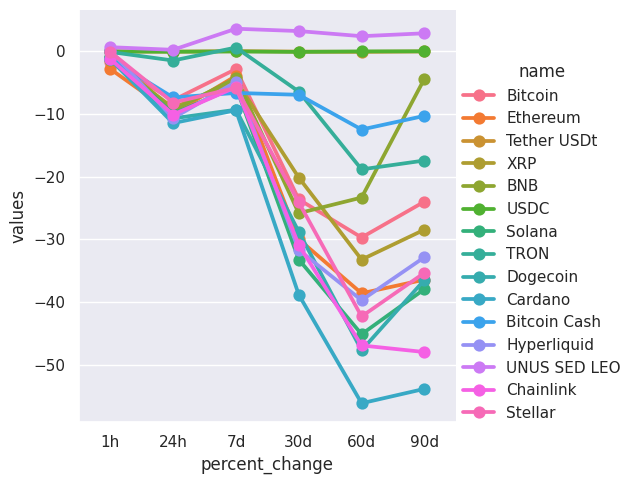

In [43]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [49]:

# we are going to create a dataframe with the columns we want

df10 = df70[['name','quote.USD.price','Timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,Timestamp
0,Bitcoin,84496.15403,2025-12-01 21:37:46.575520
15,Bitcoin,84496.15403,2025-12-01 21:38:37.122865
30,Bitcoin,84361.30224,2025-12-01 21:39:37.848290


<Axes: xlabel='Timestamp', ylabel='quote.USD.price'>

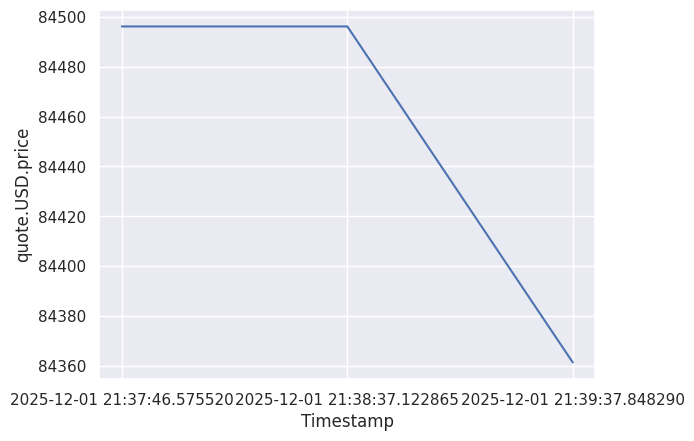

In [50]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='Timestamp', y='quote.USD.price', data = df10)